In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform, cdist

In [3]:
def softplus_inv(x):
    return np.log(np.exp(x) - 1)

In [4]:
plt.style.use('seaborn-poster')

In [5]:
learned = np.load('learned-103120.npz')
learned['note']
#control = np.load('learned-control-082020.npz')

array('cpp2g - epsilon = 60, init with mu = half control mu, a = half control mu, b = .01*ones, bjj = 1, model with self',
      dtype='<U113')

In [6]:
dat = loadmat('/tigress/architv/ORGANIZED_CODE_FOR_UPLOAD/tapi_dose.mat')

In [7]:
control_mu = np.zeros(20)
for i in range(20):
    well = i
    traces = dat['well'][0][well]['PeakTimes']
    peaks = 0
    for j in range(len(traces[0])):
        peaks += len(traces[0][j])
    x = dat['well'][0][well]['x']
    control_mu[i] = peaks/(480. * x.shape[1])

In [8]:
100 * np.divide(learned['mu'][0][1:,0] - control_mu[1:], control_mu[1:])

array([-3.42479631, -3.12282473, -4.94791443, -5.20922185, -3.13878155,
       -3.45604336, -4.16665094, -3.36763455, -3.12035308, -3.12004978,
       -2.89746214, -3.15723921, -4.12155991, -3.79047127, -3.61579187,
       -3.13326651, -3.66591386, -2.8704319 , -4.80253973])

In [9]:
control_mu

array([0.0234375 , 0.01480429, 0.01753003, 0.01818182, 0.02139985,
       0.01387472, 0.01366279, 0.01325967, 0.01220878, 0.01260965,
       0.00994078, 0.01042775, 0.01151961, 0.01073543, 0.0109095 ,
       0.01061321, 0.01056171, 0.01      , 0.01089481, 0.01072573])

In [10]:
# plt.scatter(control_mu[1:], learned['mu'][0][1:,0], s = 5)
# plt.plot([0,0.02],[0,0.02],'k--')
# plt.show()

In [11]:
names = ['$\mu$','a','b','$\epsilon$','$a_{jj}$']

In [12]:
tapi_concentrations = np.array([0,0,0,0, 5,5,5,5,5, 10,10,10,10,10, 20,20,20,20,20])
cs = np.unique(tapi_concentrations)

In [13]:
def return_stats(mu):

    ixs = [0,4,9,14,19]
    control = mu[0:4]
    
    means = np.zeros(4)
    SEs = np.zeros(4)
    ps = np.zeros(4)
    Ts = np.zeros(4)
    
    
    for i in range(len(cs)):
        low = ixs[i]
        high = ixs[i+1]
        #print(cs[i])
        sample = mu[low:high]
        means[i] = np.mean(sample)
        SEs[i] = stats.sem(sample)
        if i > 0:
            Ts[i], ps[i] = stats.ttest_ind(control, sample, equal_var = False)
            #print(stats.ttest_ind(control, sample, equal_var = False))
    return means, SEs, ps, Ts

[1.72117898 1.26701641 1.03402147 1.01772705]
[0.12246441 0.03025786 0.02491412 0.01527017]
[0.         0.0303762  0.00956902 0.00984622]
 


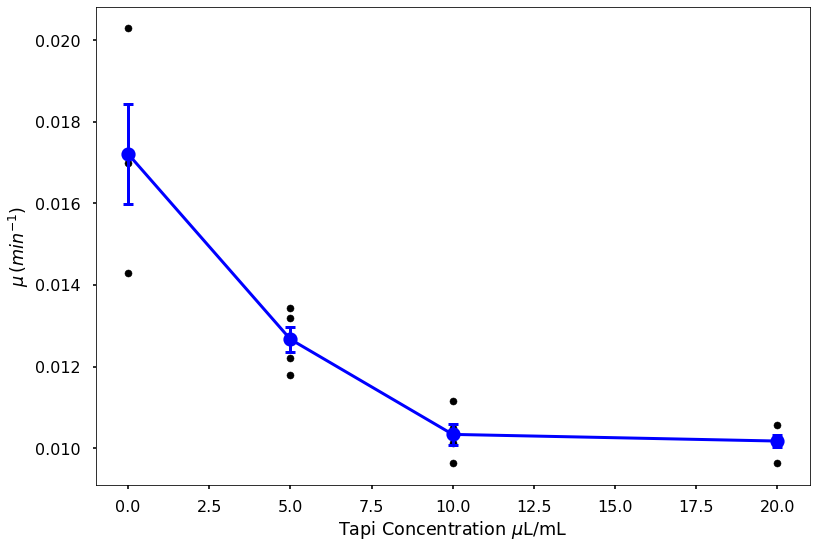

In [14]:
for j in range(1):
    means, SEs, ps, Ts = return_stats(np.reshape(learned['mu'][j,1:],-1))
    print(means * 100)
    print(SEs* 100)
    print(ps)
    print(' ')
    
for j in range(1):
    plt.errorbar([0,5,10,20], means, yerr = SEs, fmt = 'bo-', 
                 capsize= 5, elinewidth=3, markeredgewidth = 3, linewidth = 3)
    plt.scatter(tapi_concentrations, learned['mu'][j,1:],
           c = 'k', s = 50.)
    plt.xlabel('Tapi Concentration $\mu$L/mL')
    plt.ylabel('$\mu \, (min^{-1})$')
    plt.savefig('tapi-mu-103120.pdf')

mu = means

In [15]:
print(SEs * 10e2)

[1.2246441  0.30257856 0.24914118 0.15270174]


In [16]:
1.52097763e-04 * 1e3

0.152097763

In [17]:
for j in range(1):
    means, SEs, ps, Ts = return_stats(np.reshape(learned['a'][j,1:],-1))
    print(means * 100)
    print(SEs * 100)
    print(ps)
    print('')
    
for j in range(3):
    print(stats.linregress(tapi_concentrations, np.reshape(learned['a'][j,1:],-1)))
    print(' ')
    
a = means

[1.1558085  0.67324868 0.5872034  0.60597306]
[0.20667658 0.02781085 0.04131664 0.07469549]
[0.         0.10057691 0.06799391 0.07013628]

LinregressResult(slope=-0.0002146507973755397, intercept=0.009321972948658136, rvalue=-0.5412259827271313, pvalue=0.016707648029324992, stderr=8.088387987645276e-05)
 
LinregressResult(slope=0.0, intercept=0.0, rvalue=0.0, pvalue=1.0, stderr=0.0)
 
LinregressResult(slope=0.0, intercept=0.0, rvalue=0.0, pvalue=1.0, stderr=0.0)
 


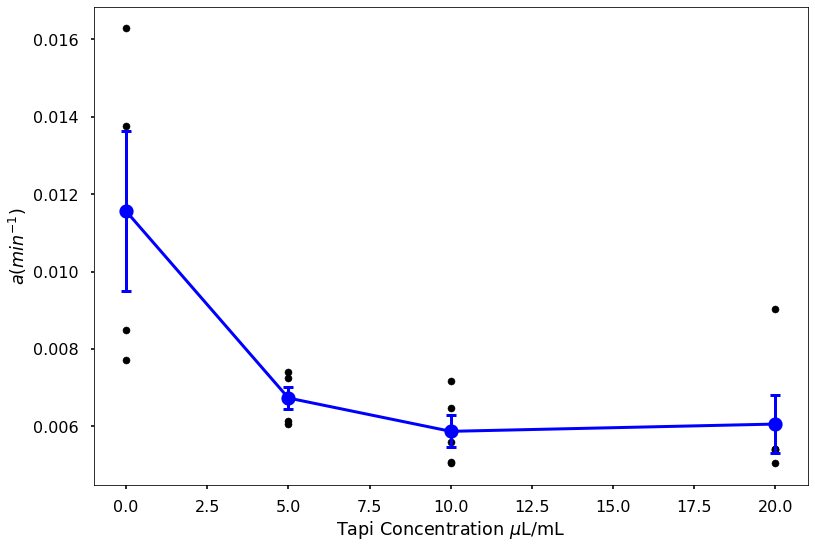

In [18]:
for j in range(1):
    plt.errorbar([0,5,10,20], means, yerr = SEs, fmt = 'bo-', 
                 capsize= 5, elinewidth=3, markeredgewidth = 3, linewidth = 3)
    plt.scatter(tapi_concentrations, learned['a'][j,1:],
        c = 'k', s = 50., label = j)
    plt.xlabel('Tapi Concentration $\mu$L/mL')
    plt.ylabel('$a (min^{-1})$')
plt.savefig('tapi-a-103120.pdf')

[0.82714919 0.77820902 0.70947337 0.68197829]
[0.10343737 0.06980919 0.02750911 0.01146202]
[0.         0.70966853 0.34275889 0.25532515]
 


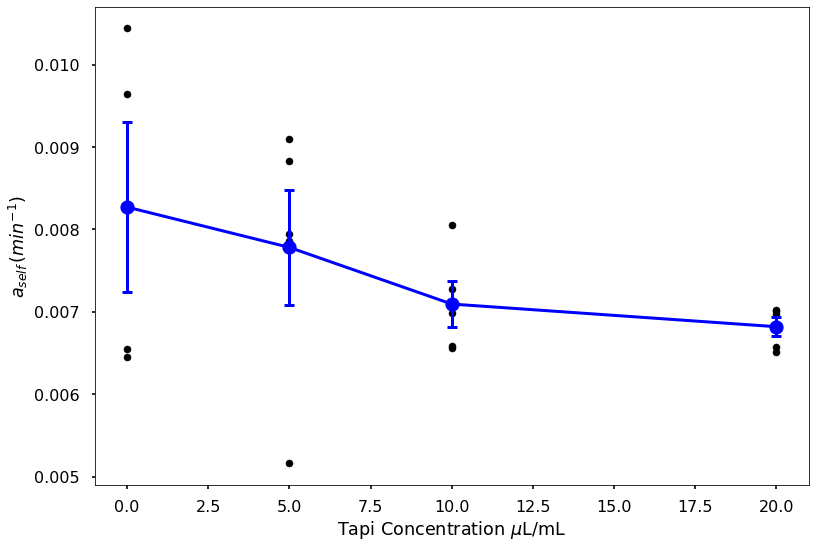

In [19]:
for j in range(1):
    ajj = np.multiply(np.reshape(learned['ajj'][j,1:],-1), np.reshape(learned['a'][j,1:],-1))
    means, SEs, ps, Ts = return_stats(ajj)
    print(means * 100)
    print(SEs* 100)
    print(ps)
    print(' ')
    
for j in range(1):
    plt.errorbar([0,5,10,20], means, yerr = SEs, fmt = 'bo-', 
                 capsize= 5, elinewidth=3, markeredgewidth = 3, linewidth = 3)
    plt.scatter(tapi_concentrations, ajj,
           c = 'k', s = 50.)
    plt.xlabel('Tapi Concentration $\mu$L/mL')
    plt.ylabel('$a_{self} \, (min^{-1})$')
    plt.savefig('tapi-ajj-103120.pdf')

#ajj = means

[0.29152292 0.65858614 0.56526866 0.68972113]
[0.16830578 0.17563031 0.20036661 0.17274373]
[0.         0.17548073 0.33030424 0.14330921]
 


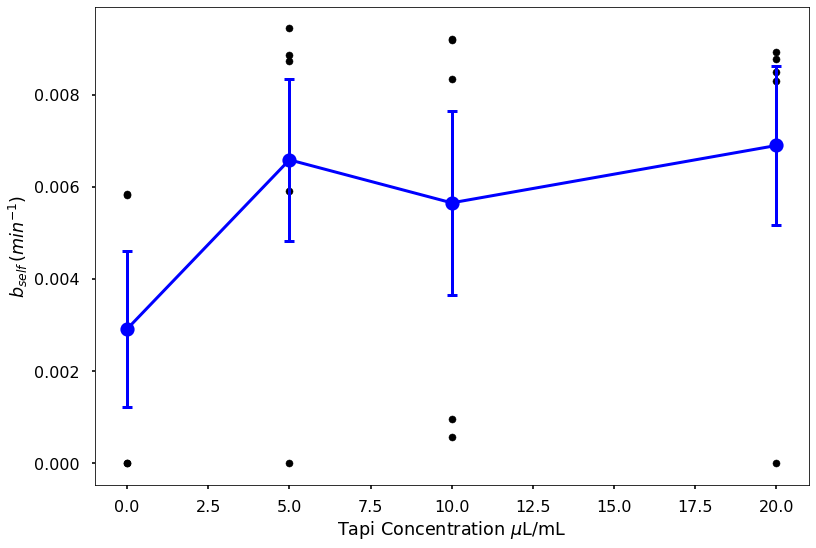

In [20]:
for j in range(1):
    bjj = np.multiply(np.reshape(learned['bjj'][j,1:],-1), np.reshape(learned['b'][j,1:], -1))
    means, SEs, ps, Ts = return_stats(bjj)
    print(means * 100)
    print(SEs* 100)
    print(ps)
    print(' ')
    
for j in range(1):
    plt.errorbar([0,5,10,20], means, yerr = SEs, fmt = 'bo-', 
                 capsize= 5, elinewidth=3, markeredgewidth = 3, linewidth = 3)
    plt.scatter(tapi_concentrations, bjj,
           c = 'k', s = 50.)
    plt.xlabel('Tapi Concentration $\mu$L/mL')
    plt.ylabel('$b_{self} \, (min^{-1})$')
    plt.savefig('tapi-bjj-103120.pdf')
    #plt.show()

#bjj = means

[0.29152292 0.65858614 0.56526866 0.68972113]
[0.16830578 0.17563031 0.20036661 0.17274373]
[0.         0.17548073 0.33030424 0.14330921]
 


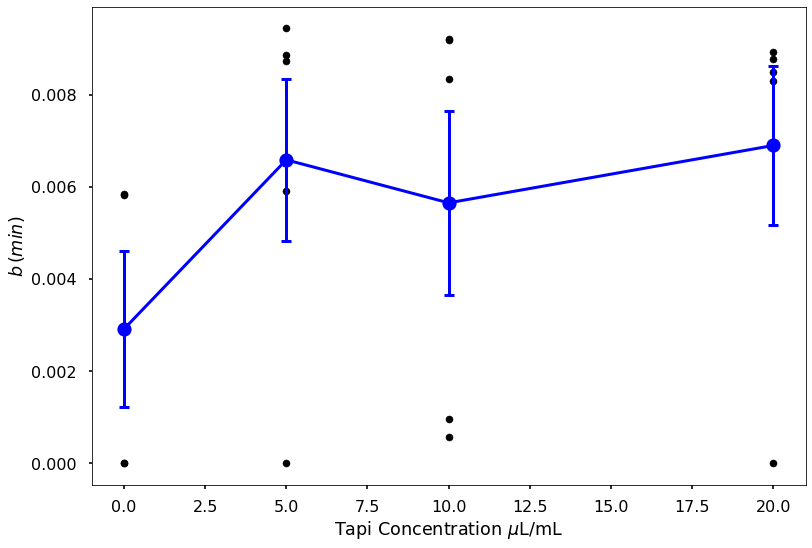

In [21]:
for j in range(1):
    bhat = np.reshape(learned['b'][j,1:], -1)
    #muhat = np.reshape(learned['mu'][j,1:], -1)
    means, SEs, ps, Ts = return_stats(bhat)
    print(means * 100)
    print(SEs* 100)
    print(ps)
    print(' ')
    
for j in range(1):
    plt.errorbar([0,5,10,20], means, yerr = SEs, fmt = 'bo-', 
                 capsize= 5, elinewidth=3, markeredgewidth = 3, linewidth = 3)
    bhat = np.reshape(learned['b'][j,1:], -1)
    #muhat = np.reshape(learned['mu'][j,1:], -1)
    plt.scatter(tapi_concentrations, bhat,
           c = 'k', s = 50.)
    plt.xlabel('Tapi Concentration $\mu$L/mL')
    plt.ylabel('$b\,(min)$')
    plt.savefig('tapi-b-103120.pdf')

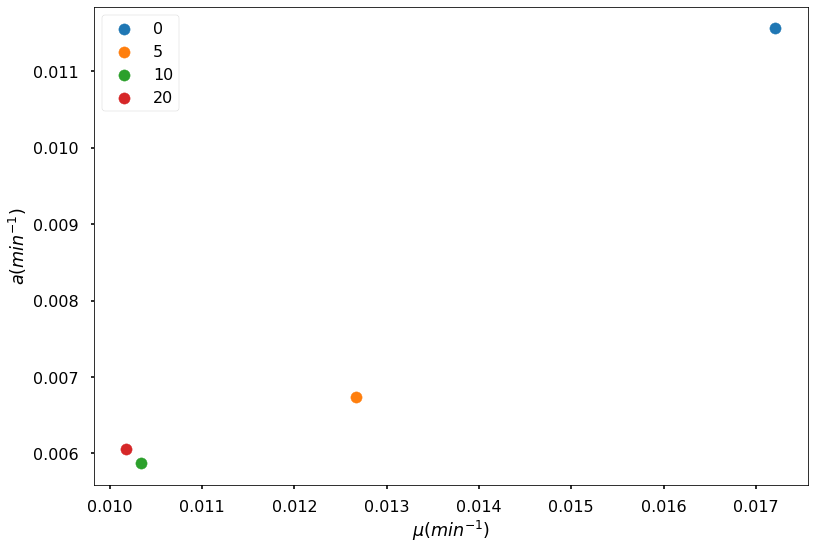

In [22]:
for i in range(len(cs)):
    plt.scatter(mu[i], a[i], label = cs[i])
plt.xlabel('$\mu (min^{-1})$')
plt.ylabel('$a (min^{-1})$')
plt.legend()
plt.savefig('tapi-a-mu-103120.pdf')

In [23]:
learned['likelihood'][0]

array([   0.        , 4799.47802734, 4633.29101562, 5000.68994141,
       4800.99609375, 5113.40820312, 4393.29833984, 5587.16699219,
       2908.99707031, 1842.74658203, 5202.91210938, 5198.99902344,
       4586.03027344, 5034.30078125, 5184.203125  , 4432.85693359,
       4385.29150391, 3987.93115234, 5220.36474609, 4683.3125    ])